In [4]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 

fm=mp.font_manager.FontManager()
plt.rcParams['font.family']='Malgun Gothic'

#plt.style.use("seaborn-pastel")
plt.style.use("fivethirtyeight")

In [5]:
df=pd.read_csv('데이터_삼성카드.csv')
df

,년도,월,시군,동,업종명_중분류,전체건수,20대,30대,40대,50대,...,0-6시,6-8시,8-10시,10-12시,12-14시,14-16시,16-18시,18-20시,20-22시,22-24시
0,2020,3,목포시,중앙동2가,음식점,79,0,14,19,14,...,0,0,0,0,39,12,0,14,0,0
1,2020,1,군산시,경장동,취미,70,11,17,32,0,...,16,0,0,0,0,0,0,0,0,11
2,2020,3,통영시,영운리,음식점,83,13,15,22,0,...,0,0,0,0,25,27,14,0,0,0
3,2020,3,군산시,조촌동,아울렛,3643,627,1179,968,585,...,0,0,0,93,628,1047,1009,689,177,0
4,2021,1,군산시,조촌동,서적,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7685,2020,2,목포시,산정동,커피/음료,1444,333,407,407,211,...,0,0,65,96,308,318,163,218,195,73
7686,2021,3,군산시,도암리,편의점,110,10,18,40,31,...,0,0,13,0,35,13,17,20,0,0
7687,2020,2,통영시,정량동,차량관리,37,0,0,10,0,...,0,0,0,0,0,16,0,0,0,0
7688,2020,1,통영시,화삼리,음식점,60,0,11,11,13,...,0,0,0,0,30,15,0,0,0,0


In [6]:
# 연도별 카드이용건수 합계
df_year_count=df.groupby('년도')['전체건수'].sum()
df_year_count

년도
2020    1579022
2021    1549475
Name: 전체건수, dtype: int64

2020년도보다 2021년도에 카드 이용건수가 소폭 줄음


In [7]:
# 월별 카드이용금액 합계
df_month_money=df.groupby('월')['전체건수'].sum()
df_month_money

월
1    1082232
2     970975
3    1075290
Name: 전체건수, dtype: int64

2월에 가장 카드 이용건수가 낮음 (아마 2월이 가장 짧아서 그런거일수도,,?)

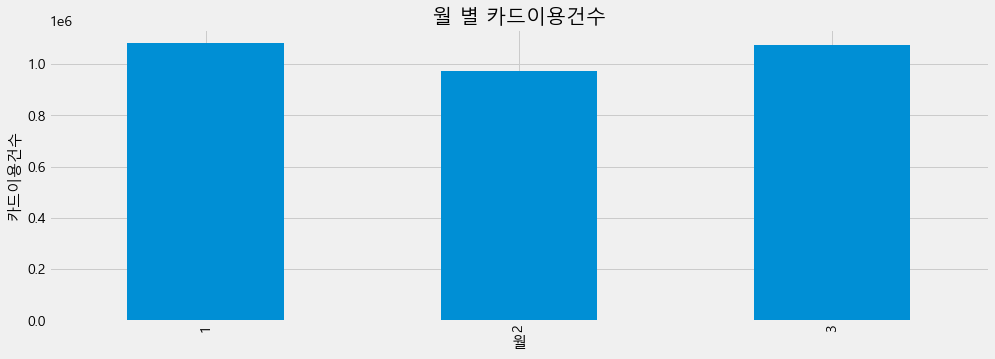

In [8]:
df_month_count=df.groupby(['월'])['전체건수'].sum()
plt.figure(figsize=(15, 5))
plt.title('월 별 카드이용건수', fontsize=20)
df_month_count.plot(kind='bar')
plt.ylabel('카드이용건수', fontsize=15)
plt.xlabel('월', fontsize=15)
plt.show()

Text(0.5, 0, '연도/월')

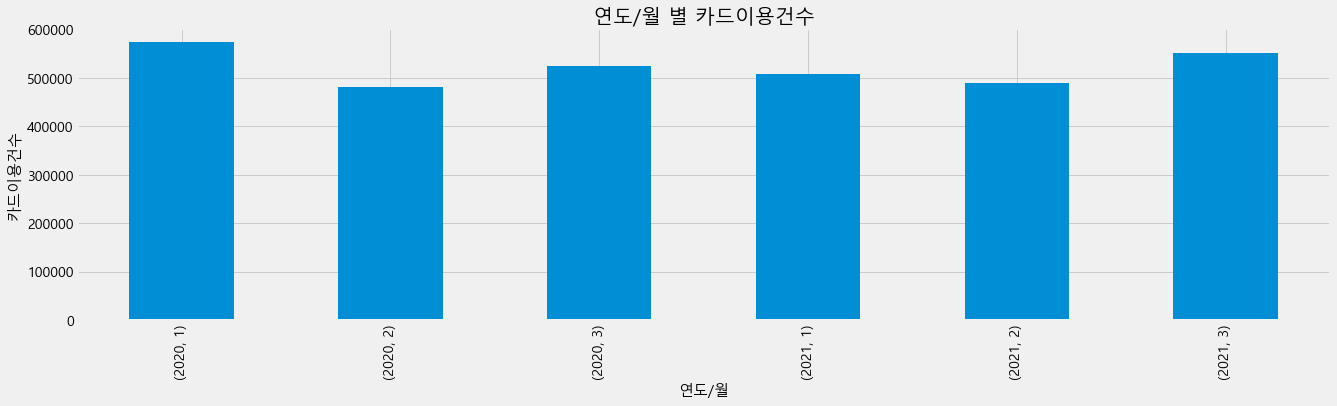

In [9]:
df_year_month_count=df.groupby(['년도', '월'])['전체건수'].sum()
plt.figure(figsize=(20, 5))
plt.title('연도/월 별 카드이용건수', fontsize=20)
df_year_month_count.plot(kind='bar')
plt.ylabel('카드이용건수', fontsize=15)
plt.xlabel('연도/월', fontsize=15)

2020년 1월에 가장 이용건수가 높았다-> 그땐 코로나가 심하지 않았기 때문이 아닐까?

In [10]:
df_month1=df[df['월']==1]

df_month1_count=df_month1.groupby(['업종명_중분류'])['전체건수'].sum()

Text(0.5, 1.0, '1월 인기업종')

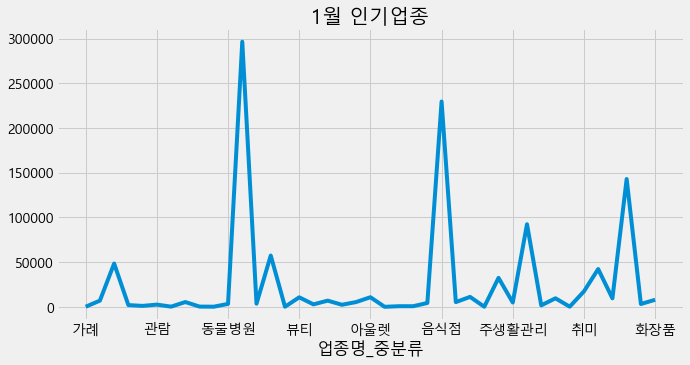

In [11]:
plt.figure(figsize=(10,5))
df_month1_count.plot()
plt.title('1월 인기업종', fontsize=20)

Text(0.5, 1.0, '1월 인기업종')

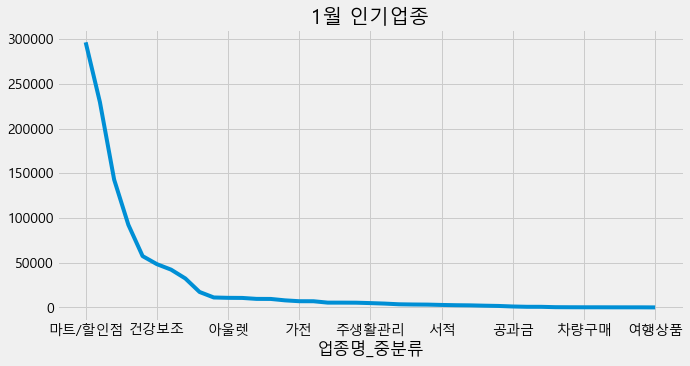

In [12]:

plt.figure(figsize=(10,5))
df_month1_count.sort_values(ascending=False).plot()
plt.title('1월 인기업종', fontsize=20)

### 마트/할인점을 가장 많이 이용한다
1.마트
2.건강보조
3. 아울렛
4. 가전

<AxesSubplot:xlabel='업종명_중분류', ylabel='전체건수'>

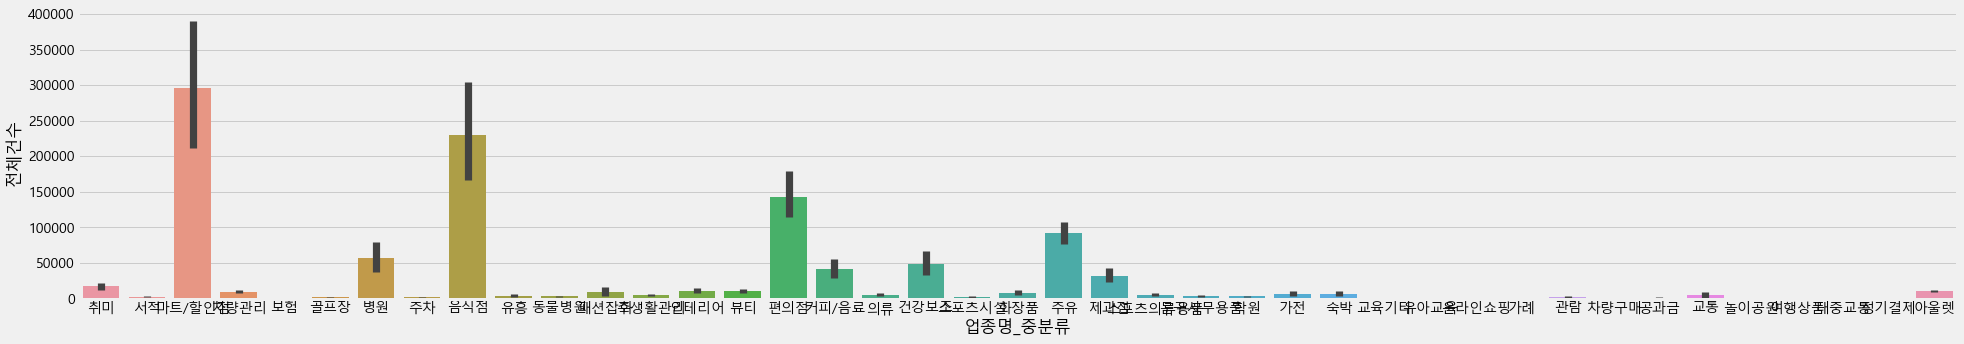

In [13]:
plt.figure(figsize=(30, 5))
sns.barplot(data=df_month1, x="업종명_중분류", y="전체건수", estimator=sum)

Text(0.5, 1.0, '2월 인기업종')

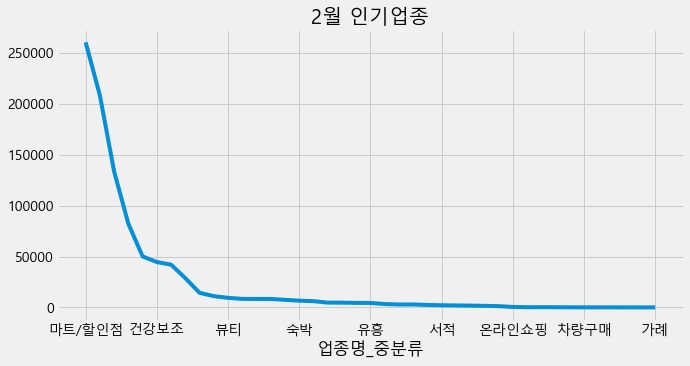

In [14]:
df_month2=df[df['월']==2]

df_month2_count=df_month2.groupby(['업종명_중분류'])['전체건수'].sum()

plt.figure(figsize=(10,5))
df_month2_count.sort_values(ascending=False).plot()
plt.title('2월 인기업종', fontsize=20)

### 마트/할인점 가장 많이 사용한다
1월과 다르게 2월엔 3위부터 뷰티, 숙박, 유흥이 증가한다


날씨가 풀려서 관광 유입이 커지는건가?

<AxesSubplot:xlabel='업종명_중분류', ylabel='전체건수'>

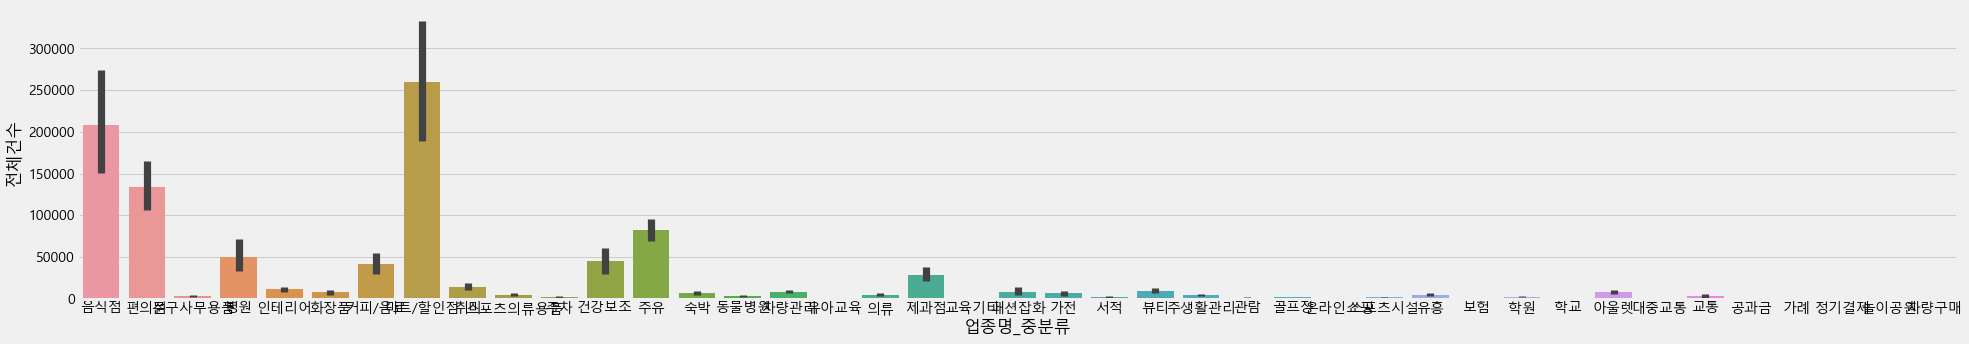

In [15]:
plt.figure(figsize=(30, 5))
sns.barplot(data=df_month2, x="업종명_중분류", y="전체건수", estimator=sum)

Text(0.5, 1.0, '3월 인기업종')

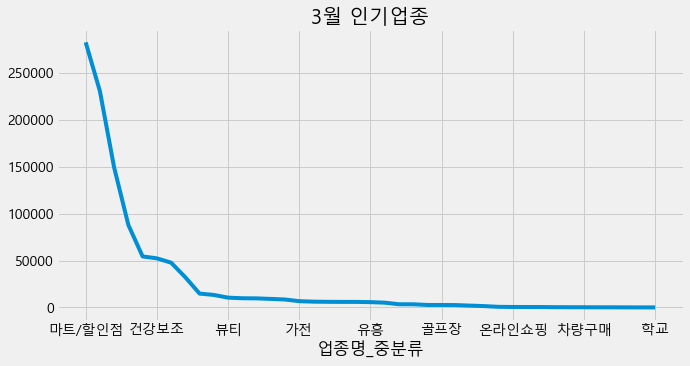

In [16]:
df_month3=df[df['월']==3]

df_month3_count=df_month3.groupby(['업종명_중분류'])['전체건수'].sum()

plt.figure(figsize=(10,5))
df_month3_count.sort_values(ascending=False).plot()
plt.title('3월 인기업종', fontsize=20)

### 마트/할인점이 여전히 1위

개학철을 맞아 학교 관련 상품 판매가 증가

가전 상품 판매량 증가

# 시 별 카드 이용건수

In [17]:
df2=df[['시군','업종명_중분류','전체건수']]
df3=df2[(df2['시군']=='군산시')]
df4=df2[(df2['시군']=='목포시')]
df5=df2[(df2['시군']=='통영시')]

In [18]:
df3_kind_count=df3.groupby(['업종명_중분류'])['전체건수'].sum()
df4_kind_count=df4.groupby(['업종명_중분류'])['전체건수'].sum()
df5_kind_count=df5.groupby(['업종명_중분류'])['전체건수'].sum()

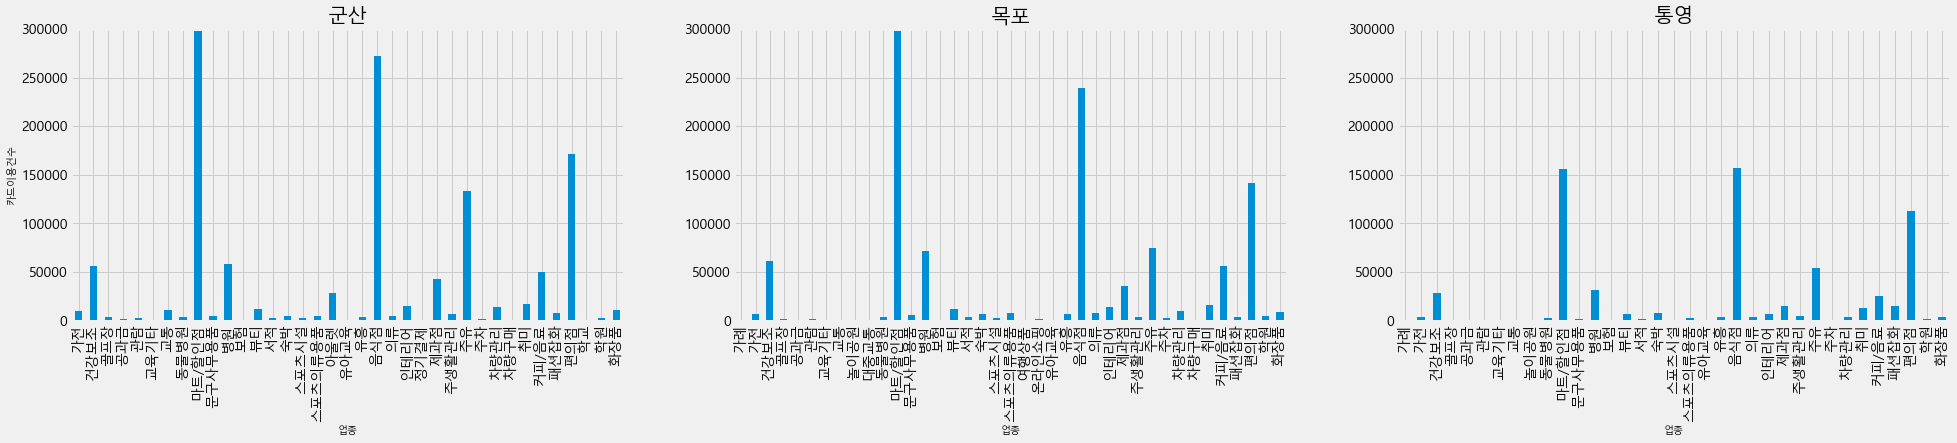

In [19]:
plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
df3_kind_count.plot(kind='bar', title='군산')
plt.ylim(0,300000)
plt.ylabel('카드이용건수', fontsize=10)
plt.xlabel('업종', fontsize=10)
 
plt.subplot(1, 3, 2)
df4_kind_count.plot(kind='bar', title='목포')
plt.ylim(0,300000)
plt.xlabel('업종', fontsize=10)
 
plt.subplot(1, 3, 3)
df5_kind_count.plot(kind='bar', title='통영')
plt.ylim(0,300000)
plt.xlabel('업종', fontsize=10)
 
plt.show()

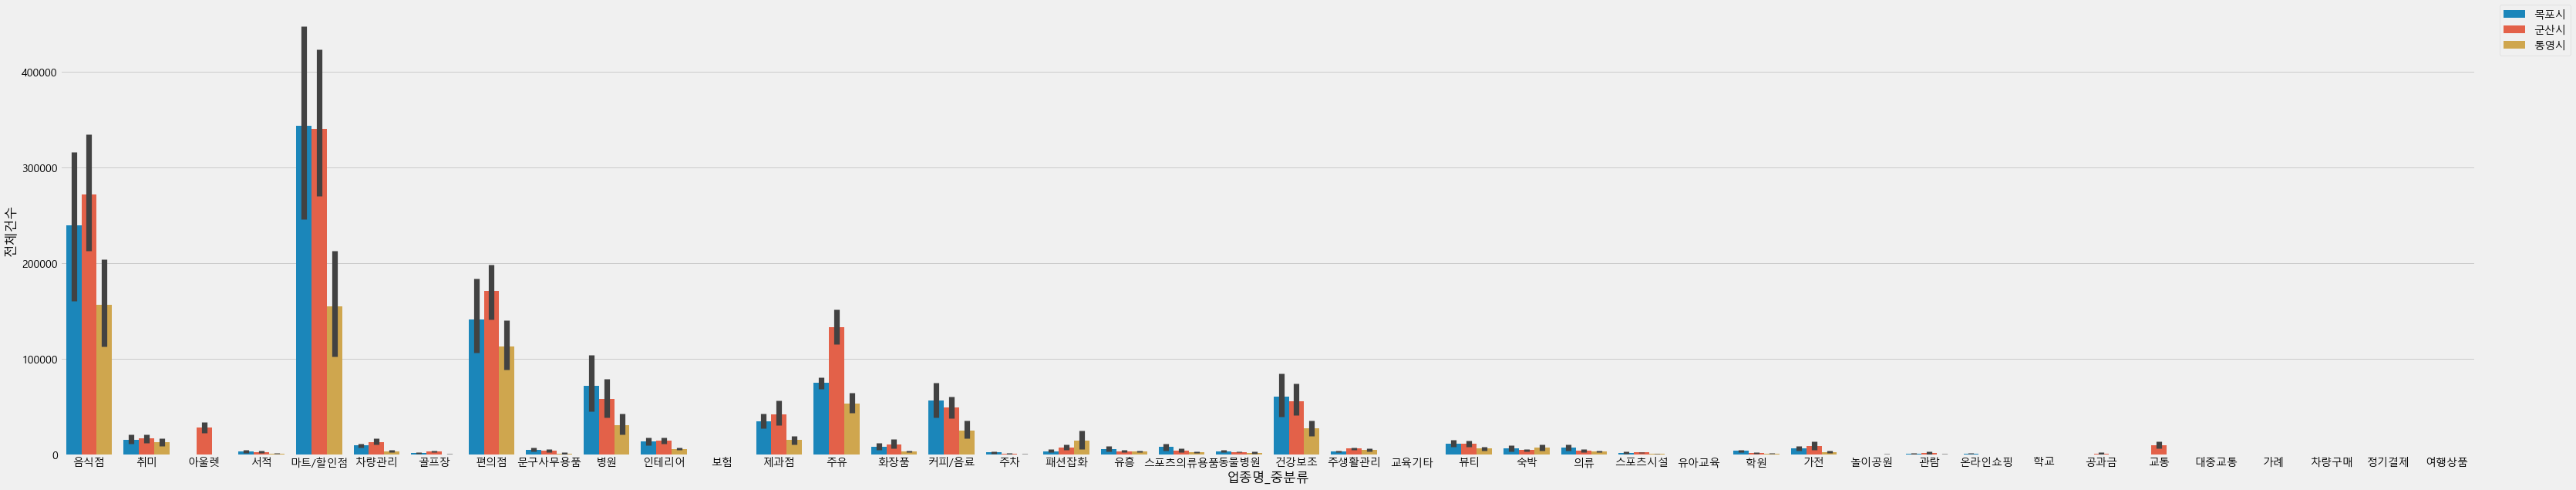

In [20]:
plt.figure(figsize=(50, 10))
sns.barplot(data=df, x="업종명_중분류", y="전체건수", hue="시군",estimator=sum)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='업종명_중분류', ylabel='전체건수'>

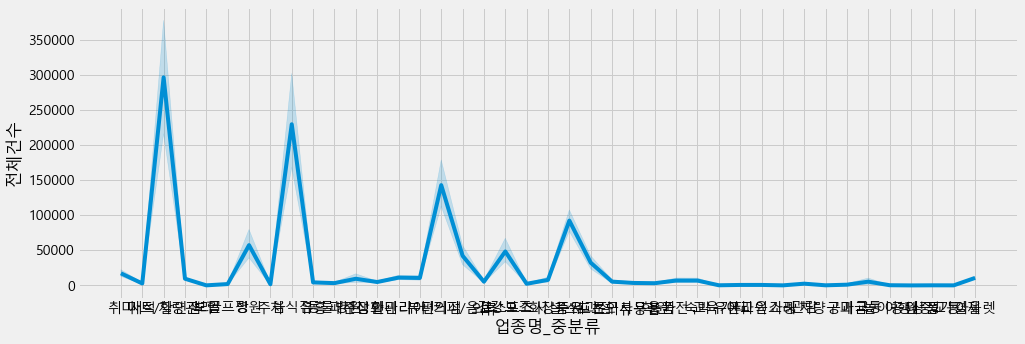

In [21]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_month1, x="업종명_중분류", y="전체건수", estimator=sum)

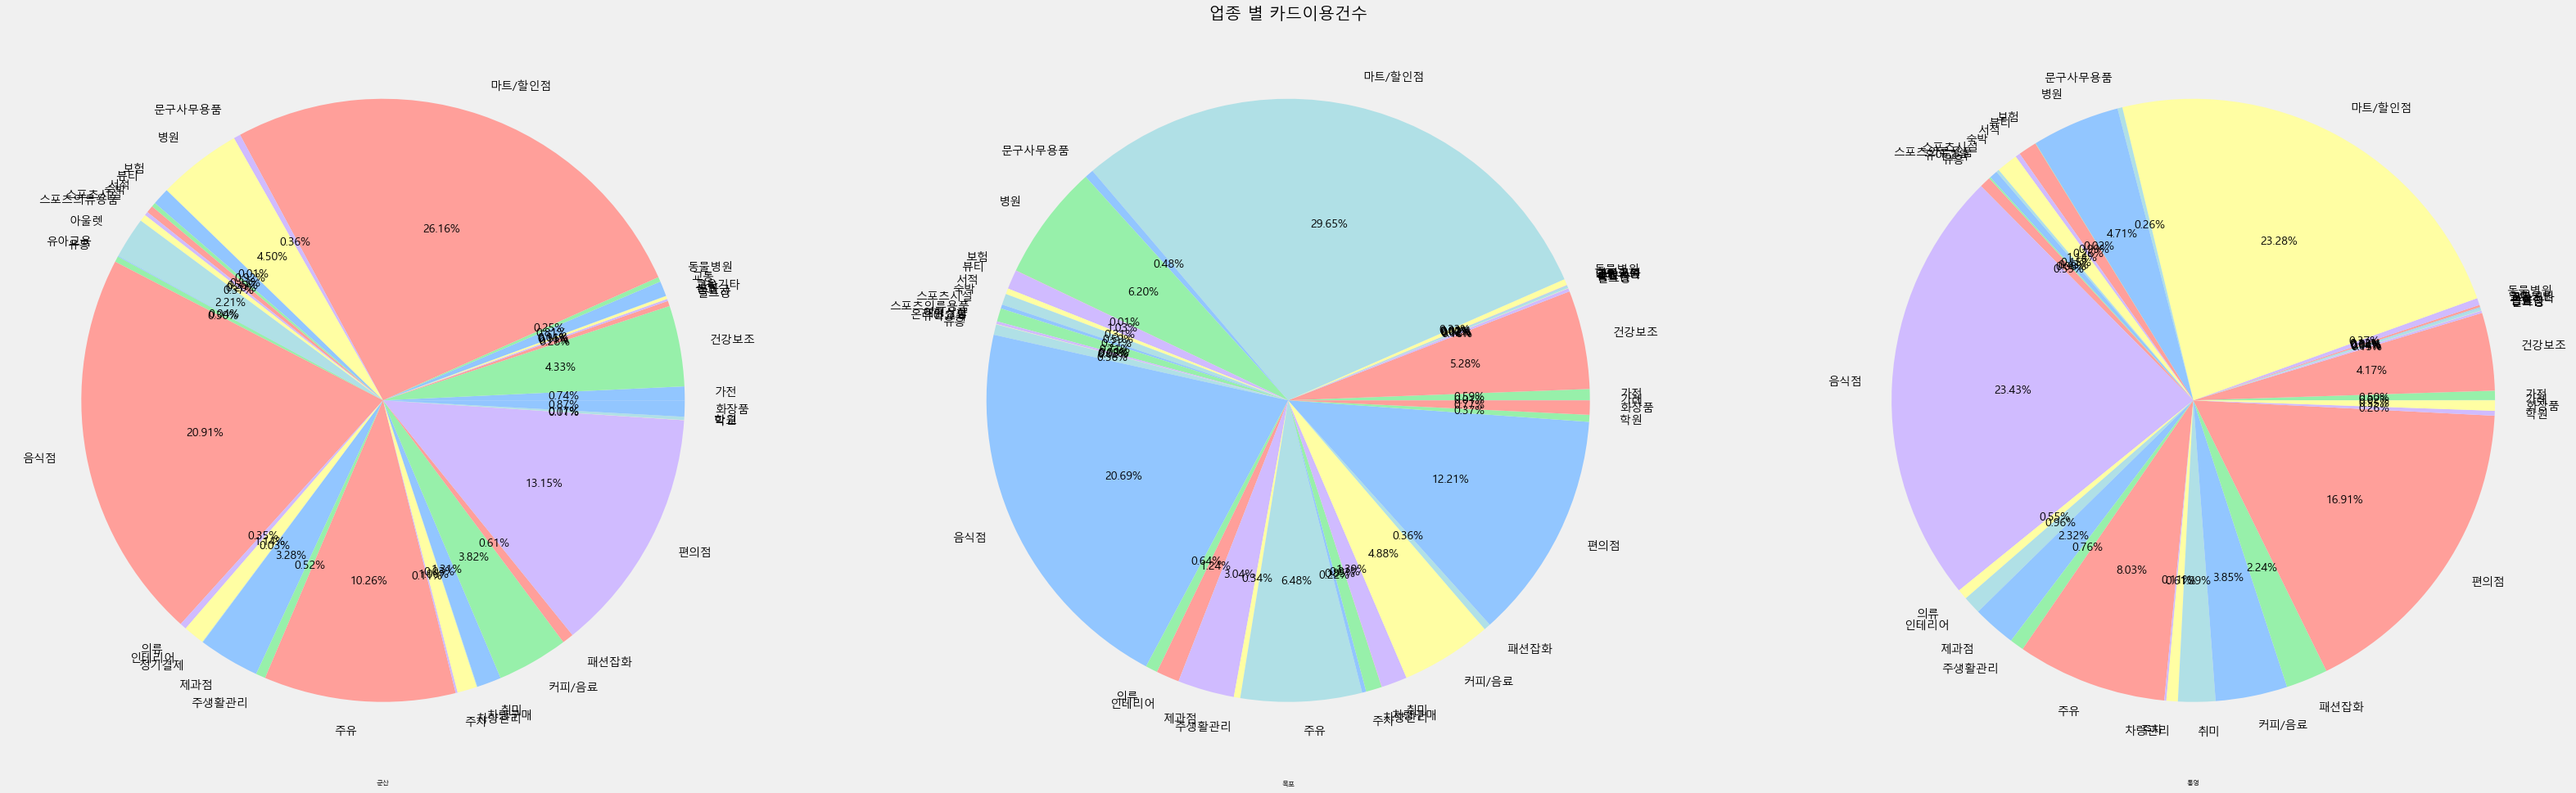

In [22]:
plt.style.use("seaborn-pastel")

plt.figure(figsize=(50, 50))

plt.subplot(1, 3, 1)
df3_kind_count.plot(kind='pie',  autopct=lambda p : '{:.2f}%'.format(p))
plt.xlabel('군산', fontsize=8)
plt.ylabel('', fontsize=8)
 
plt.subplot(1, 3, 2)
df4_kind_count.plot(kind='pie', autopct=lambda p : '{:.2f}%'.format(p))
plt.xlabel('목포', fontsize=8)
plt.title('업종 별 카드이용건수', fontsize=20)
plt.ylabel('', fontsize=8)
 
plt.subplot(1, 3, 3)
df5_kind_count.plot(kind='pie', autopct=lambda p : '{:.2f}%'.format(p))
plt.xlabel('통영', fontsize=8)
plt.ylabel('', fontsize=8)
 
plt.show()

# 연령대별 카드 이용건수

## 20대

In [32]:
df_20_count=df[['20대','업종명_중분류','전체건수']]
df_20_count_2=df_20_count.groupby(['업종명_중분류'])['전체건수'].sum()

<AxesSubplot:title={'center':'20대 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

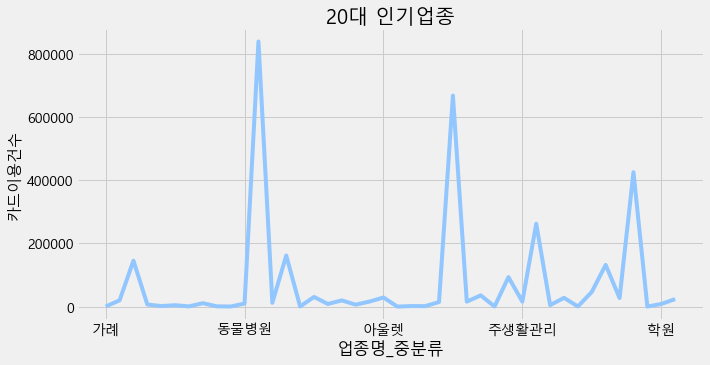

In [38]:

plt.figure(figsize=(10,5))
plt.title('20대 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_20_count.groupby(['업종명_중분류'])['전체건수'].sum().plot()

<AxesSubplot:title={'center':'20대 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

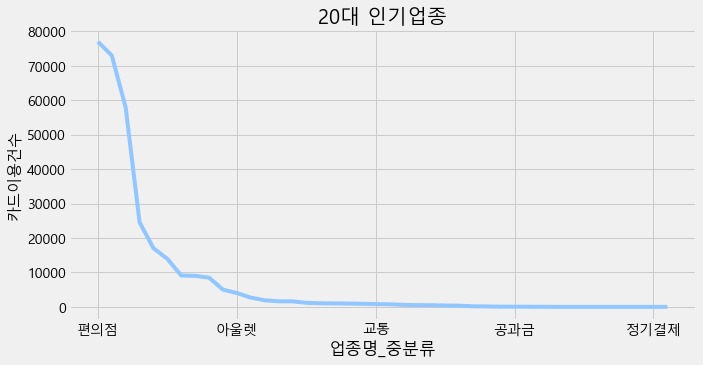

In [59]:
plt.figure(figsize=(10,5))
plt.title('20대 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_20_count.groupby(['업종명_중분류'])['20대'].sum().sort_values(ascending=False).plot()

<AxesSubplot:title={'center':'20대여자 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

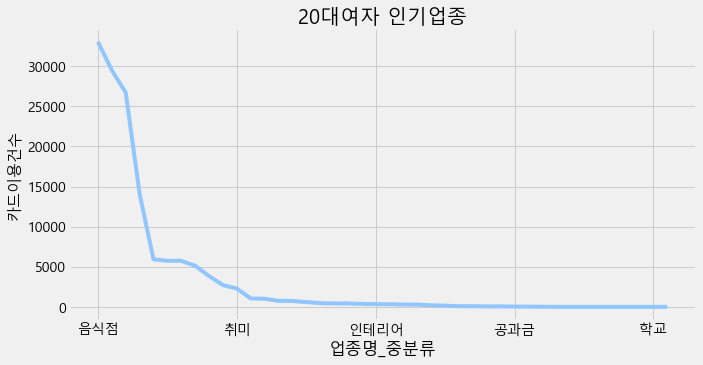

In [66]:
df_20f_count=df[['20여','업종명_중분류','전체건수']]
#df_30_count_2=df_30_count.groupby(['업종명_중분류'])['전체건수'].sum()
plt.figure(figsize=(10,5))
plt.title('20대여자 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_20f_count.groupby(['업종명_중분류'])['20여'].sum().sort_values(ascending=False).plot()

<AxesSubplot:title={'center':'20대남자 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

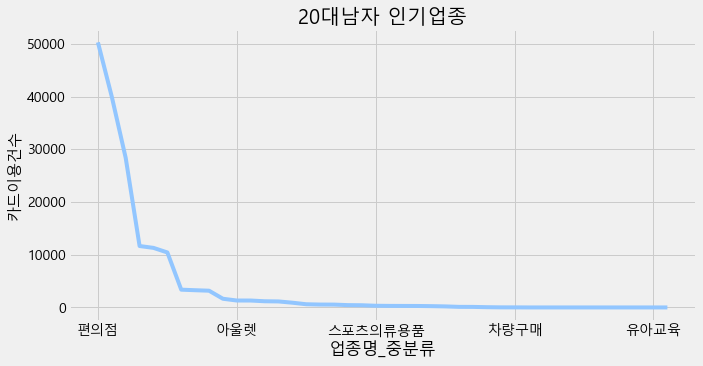

In [67]:
df_20m_count=df[['20남','업종명_중분류','전체건수']]
#df_30_count_2=df_30_count.groupby(['업종명_중분류'])['전체건수'].sum()
plt.figure(figsize=(10,5))
plt.title('20대남자 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_20m_count.groupby(['업종명_중분류'])['20남'].sum().sort_values(ascending=False).plot()

## 30대

<AxesSubplot:title={'center':'30대 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

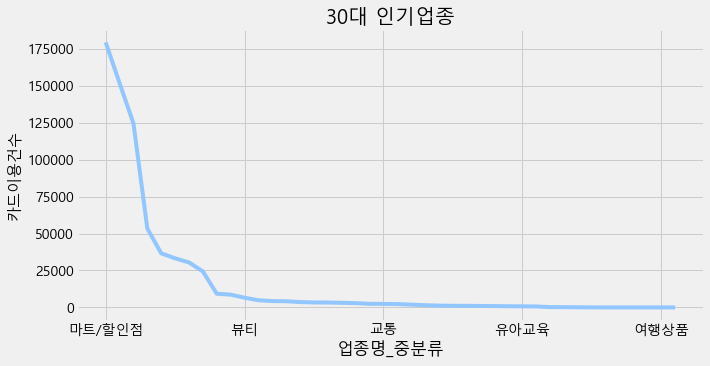

In [58]:
df_30_count=df[['30대','업종명_중분류','전체건수']]
#df_30_count_2=df_30_count.groupby(['업종명_중분류'])['전체건수'].sum()
plt.figure(figsize=(10,5))
plt.title('30대 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_30_count.groupby(['업종명_중분류'])['30대'].sum().sort_values(ascending=False).plot()

<AxesSubplot:title={'center':'30대여자 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

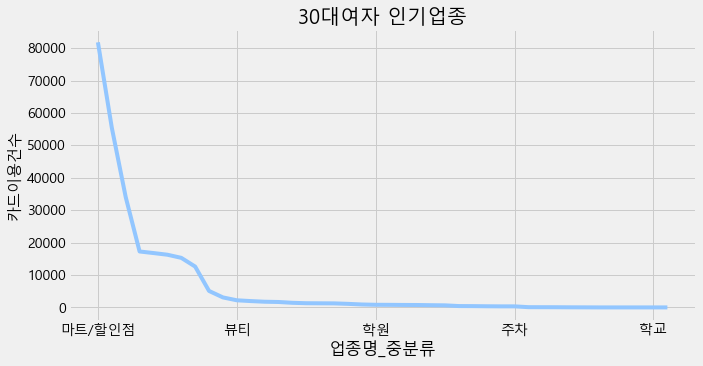

In [68]:
df_30f_count=df[['30여','업종명_중분류','전체건수']]
#df_30_count_2=df_30_count.groupby(['업종명_중분류'])['전체건수'].sum()
plt.figure(figsize=(10,5))
plt.title('30대여자 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_30f_count.groupby(['업종명_중분류'])['30여'].sum().sort_values(ascending=False).plot()

<AxesSubplot:title={'center':'30대남자 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

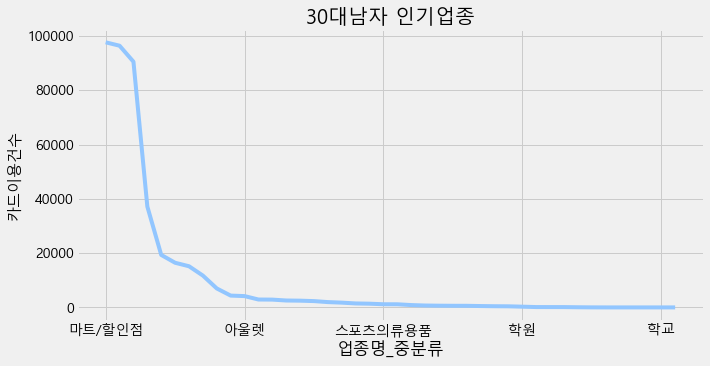

In [69]:
df_30m_count=df[['30남','업종명_중분류','전체건수']]
#df_30_count_2=df_30_count.groupby(['업종명_중분류'])['전체건수'].sum()
plt.figure(figsize=(10,5))
plt.title('30대남자 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_30m_count.groupby(['업종명_중분류'])['30남'].sum().sort_values(ascending=False).plot()

## 40대

<AxesSubplot:title={'center':'40대 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

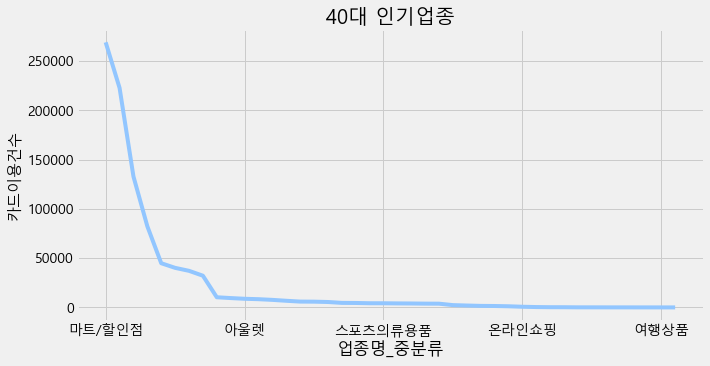

In [60]:
df_40_count=df[['40대','업종명_중분류','전체건수']]
plt.figure(figsize=(10,5))
plt.title('40대 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_40_count.groupby(['업종명_중분류'])['40대'].sum().sort_values(ascending=False).plot()

<AxesSubplot:title={'center':'40대여자 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

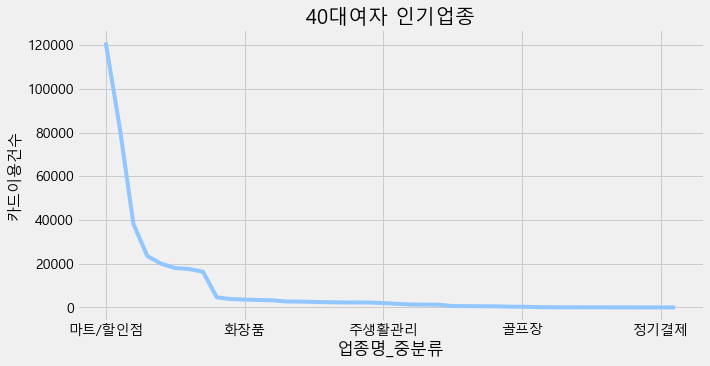

In [70]:
df_40f_count=df[['40여','업종명_중분류','전체건수']]
#df_30_count_2=df_30_count.groupby(['업종명_중분류'])['전체건수'].sum()
plt.figure(figsize=(10,5))
plt.title('40대여자 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_40f_count.groupby(['업종명_중분류'])['40여'].sum().sort_values(ascending=False).plot()

<AxesSubplot:title={'center':'40대남자 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

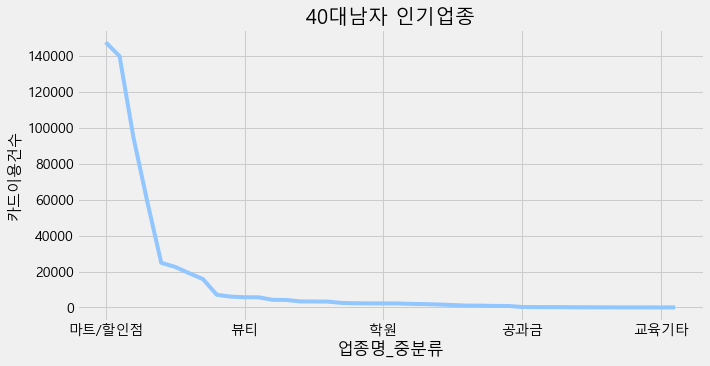

In [72]:
df_40m_count=df[['40남','업종명_중분류','전체건수']]
#df_30_count_2=df_30_count.groupby(['업종명_중분류'])['전체건수'].sum()
plt.figure(figsize=(10,5))
plt.title('40대남자 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_40m_count.groupby(['업종명_중분류'])['40남'].sum().sort_values(ascending=False).plot()

## 50대

<AxesSubplot:title={'center':'50대 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

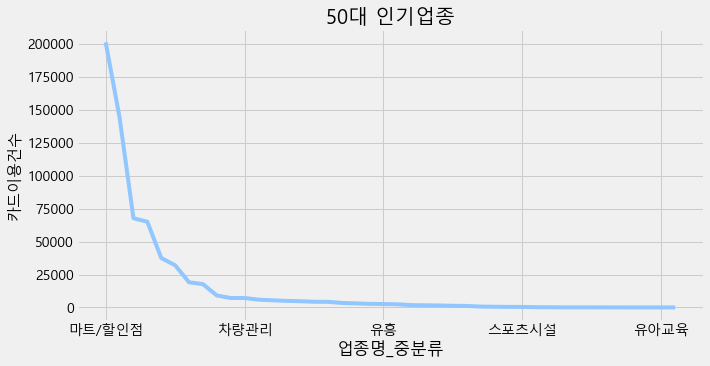

In [61]:
df_50_count=df[['50대','업종명_중분류','전체건수']]
plt.figure(figsize=(10,5))
plt.title('50대 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_50_count.groupby(['업종명_중분류'])['50대'].sum().sort_values(ascending=False).plot()

## 60대

<AxesSubplot:title={'center':'60대이상 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

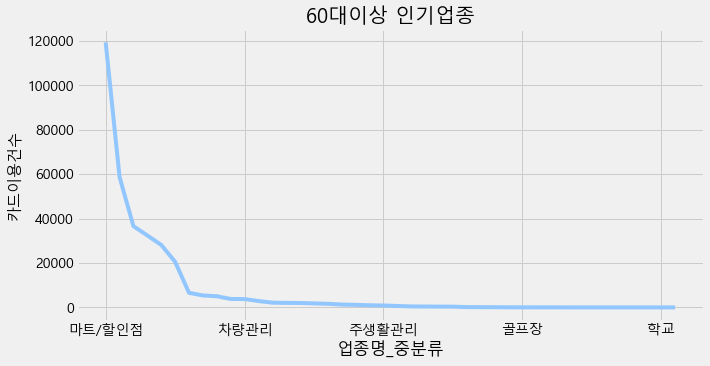

In [62]:
df_60_count=df[['60대이상','업종명_중분류','전체건수']]
plt.figure(figsize=(10,5))
plt.title('60대이상 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_60_count.groupby(['업종명_중분류'])['60대이상'].sum().sort_values(ascending=False).plot()

## 도시별

In [78]:
df_gunsan=df[df['시군']=='군산시']
df_gunsan

,년도,월,시군,동,업종명_중분류,전체건수,20대,30대,40대,50대,...,0-6시,6-8시,8-10시,10-12시,12-14시,14-16시,16-18시,18-20시,20-22시,22-24시
1,2020,1,군산시,경장동,취미,70,11,17,32,0,...,16,0,0,0,0,0,0,0,0,11
3,2020,3,군산시,조촌동,아울렛,3643,627,1179,968,585,...,0,0,0,93,628,1047,1009,689,177,0
4,2021,1,군산시,조촌동,서적,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2021,1,군산시,문화동,마트/할인점,389,41,84,120,98,...,0,0,24,32,46,50,75,78,64,19
7,2021,1,군산시,경암동,차량관리,42,0,0,0,0,...,0,0,0,0,16,0,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7681,2020,3,군산시,나운동,관람,49,10,0,0,0,...,0,0,0,0,0,15,0,12,0,0
7682,2021,1,군산시,미룡동,문구사무용품,45,0,0,13,0,...,0,0,0,0,10,16,0,0,0,0
7683,2021,2,군산시,문화동,의류,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7684,2021,1,군산시,지경리,음식점,157,10,26,48,54,...,0,0,0,10,51,19,22,30,25,0


<AxesSubplot:title={'center':'군산 전체 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

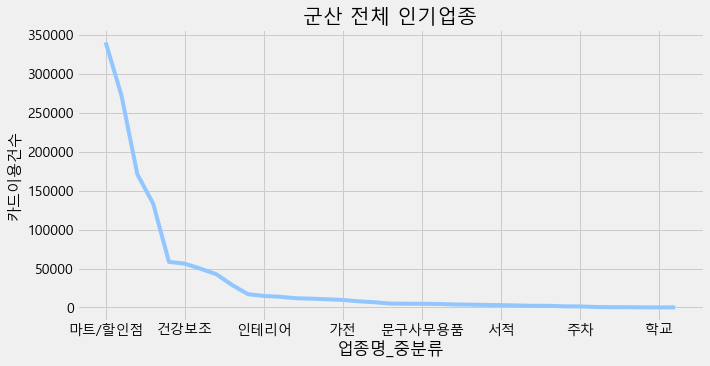

In [80]:
df_gunsan_count=df_gunsan[['업종명_중분류','전체건수']]
plt.figure(figsize=(10,5))
plt.title('군산 전체 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_gunsan_count.groupby(['업종명_중분류'])['전체건수'].sum().sort_values(ascending=False).plot()

<AxesSubplot:title={'center':'목포 전체 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

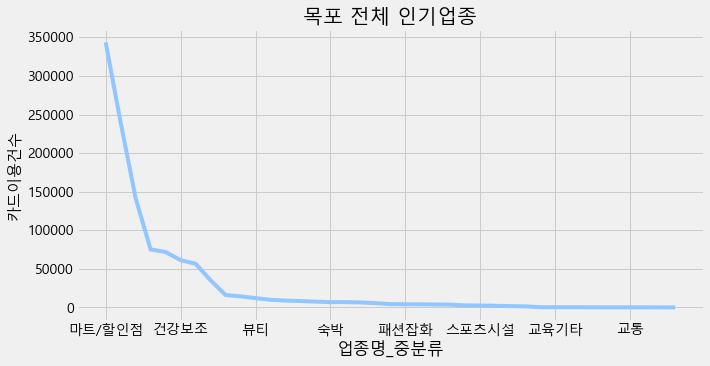

In [81]:
df_mokpo=df[df['시군']=='목포시']
df_mokpo_count=df_mokpo[['업종명_중분류','전체건수']]
plt.figure(figsize=(10,5))
plt.title('목포 전체 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_mokpo_count.groupby(['업종명_중분류'])['전체건수'].sum().sort_values(ascending=False).plot()

<AxesSubplot:title={'center':'통영 전체 인기업종'}, xlabel='업종명_중분류', ylabel='카드이용건수'>

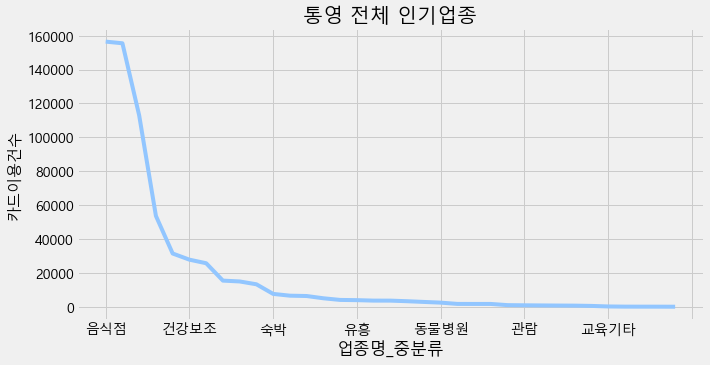

In [82]:
df_ty=df[df['시군']=='통영시']
df_ty_count=df_ty[['업종명_중분류','전체건수']]
plt.figure(figsize=(10,5))
plt.title('통영 전체 인기업종', fontsize=20)
plt.ylabel('카드이용건수', fontsize=15)
df_ty_count.groupby(['업종명_중분류'])['전체건수'].sum().sort_values(ascending=False).plot()

통영은 관광도시이기 때문에 숙박과 유흥의 비중이 타 시군보다 높음

군산은 대부분 카드 결제건수가 가정에서 필요한 물품들을 사는데에서 발생함